In [1]:
#Essai Odométrie 

In [2]:
#pour afficher les capteurs et autres du robots dans un GUI!: python3 -m tdmclient gui

In [3]:
from tdmclient import ClientAsync, aw
# import tdmclient.notebook
# await tdmclient.notebook.start()

In [4]:
#Create a Client Object:
client = ClientAsync()

In [5]:
client.process_waiting_messages()


False

In [6]:
node = client.nodes[0]
node

IndexError: list index out of range

In [ ]:
aw(node.lock())

In [ ]:
# node.wait_for_variables.__doc__

In [ ]:
import time

In [ ]:
v = {
    "motor.left.target": [0],
    "motor.right.target": [0],
}
aw(node.set_variables(v))

In [ ]:
start_time = time.time()


In [ ]:
print(start_time)

In [ ]:
def ma_fonction():
    # Code de la fonction
    pass

# Calculer le temps écoulé jusqu'à l'appel de la fonction
# elapsed_time = time.time() - start_time
print(f"Temps écoulé jusqu'à l'appel de ma_fonction: {elapsed_time} secondes")

# Appel de la fonction


In [ ]:
await node.wait_for_variables({"motor.right.speed"})
# for i in range(10):
elapsed_time = time.time() - start_time

print(node.v.motor.right.speed)
print(node.v.motor.left.speed)
print(elapsed_time)
await client.sleep(0.2)

In [ ]:
aw(node.wait_for_variables())
node.var

In [ ]:
%%run_python --clear-event-data --wait   
#ici on run le programme dans le robot 

# import clock


# timer_period[0] = 200

# @onevent
# def timer0():
#     global prox_horizontal
#     if clock.seconds() >= 4:
#         exit()
#     emit("front", clock.ticks_50Hz(), prox_horizontal[2])

In [ ]:
data = get_event_data("front")
print(data)

In [ ]:
# %%run_python --clear-event-data

# import clock

# timer_period[0] = 200

# @onevent
# def timer0():
#     global prox_horizontal
#     emit("front", clock.ticks_50Hz(), prox_horizontal[2])

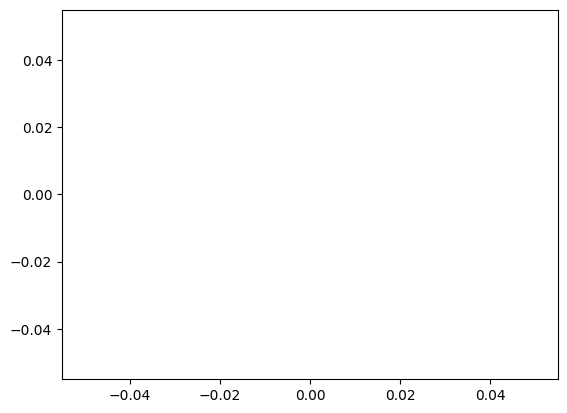

In [11]:

import matplotlib.pyplot as plt
%matplotlib inline
prox_front = get_event_data("front")
t = [data[0] / 50 for data in prox_front]
y = [data[1] for data in prox_front]
plt.plot(t, y);

In [8]:
await node.wait_for_variables({"prox.horizontal"})
for i in range(10):
    print(list(node.v.prox.horizontal))
    await client.sleep(0.2)

NameError: name 'node' is not defined

In [9]:
 import tdmclient.notebook
 from ipywidgets import interact, interactive, fixed, interact_manual
 import ipywidgets as widgets
 await tdmclient.notebook.start()

NodeLockError: Node lock error (current status: busy)

In [ ]:
 @interact(red=(0,32), green=(0,32), blue=(0,32))
 @tdmclient.notebook.sync_var
 def rgb(red=0, green=0, blue=0):
     global leds_top
     leds_top = [red, green, blue]


#si executé avec la cell d'en haut permet d'avoir des widgets pour controller de facon interactive les LED du haut!!!!!!!!!!

In [ ]:
# %%run_python

# prox0 = 1000
# gain_prc = 2
# timer_period[0] = 100

# @onevent
# def timer0():
#     global prox_horizontal, motor_left_target, motor_right_target, prox0, gain_prc
#     speed = math_muldiv(prox0 - prox_horizontal[2], gain_prc, 100)
#     motor_left_target = speed
#     motor_right_target = speed

In [ ]:
# @interact(prox_target=(0, 4000, 10))
# @tdmclient.notebook.sync_var
# def change_prox0(prox_target):
#     global prox0
#     prox0 = prox_target

In [ ]:
# stop()

In [ ]:
# from tdmclient import ClientAsync

# def motors(left, right):
#     return {
#         "motor.left.target": [left],
#         "motor.right.target": [right],
#     }

# with ClientAsync() as client:  #le with permet d'eviter d'ecrire dans le code lock et unlock node !!!
#     async def prog():
#         with await client.lock() as node:  # Le verrouillage se fait automatiquement
#             await node.set_variables(motors(50, 50))  # Démarrer les moteurs
#             await client.sleep(2)  # Attendre 2 secondes
#             await node.set_variables(motors(0, 0))  # Arrêter les moteurs
#     client.run_async_program(prog)


In [ ]:
# from tdmclient import ClientAsync
# await client.lock()

In [1]:
%%run_python

time = 0
period = 10
timer_period[0] = period # milliseconds
start = False
measure_duration = 10000 # milliseconds
motor_speed = 200

@onevent 
def button_center(): # stop moving
    global start
    start = False

@onevent 
def button_forward(): # start moving
    global start
    start = True

@onevent 
def timer0():
    global start, time, period, measure_duration, motor_left_target, motor_right_target, motor_speed

    if start == True:
        time += period
        if time >= measure_duration:
            motor_left_target = 0
            motor_right_target = 0
        else:
            motor_left_target = motor_speed
            motor_right_target = motor_speed

    else:
        time = 0
        motor_left_target = 0
        motor_right_target = 0

UsageError: Cell magic `%%run_python` not found.


------------------------------------------------------DEBUT ODOM------------------------------------------------------

In [ ]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

import time

In [ ]:
node.list

In [ ]:
def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

In [ ]:
v = {
    "motor.left.target": [50],
    "motor.right.target": [50],
}
aw(node.set_variables(v))

In [ ]:
start_time = time.time()


In [ ]:
print(start_time)

In [ ]:
from tdmclient import ClientAsync

def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

with ClientAsync() as client:
    async def prog():
        with await client.lock() as node:
            await node.set_variables(motors(50, 50))
            await client.sleep(2)
            await node.set_variables(motors(0, 0))
            
            left_speed = node["motor_left_speed"]
            right_speed = node["motor.right.speed"]
            print(f"Vitesse gauche : {left_speed}, Vitesse droite : {right_speed}")
            
    client.run_async_program(prog)



In [ ]:
THYMIO_MMS = 0.2978
#def odometry(x,y,theta):

dt = time.time() - start_time

motor_speed_right = node.v.motor.right.speed #attention le .target est la commande envoye au moteur alors que .speed est la vitesse mesuree réelle
motor_speed_left = node.v.motor.left.speed

#d_center = (d_left +d_right)/2
#phi = (d_right - d_left)/d_baseline
v = (motor_speed_right +  motor_speed_left)*THYMIO_MMS
w = (motor_speed_right -  motor_speed_left)*THYMIO_MMS

theta = theta + phi
x += d_center*math_cos(theta)
y += d_center*math_sin(theta)

    #return x, y, theta


Stockage fonction random

In [ ]:
#Debut de ma fonction controle

angle_error = 0
sum_error_angle = 0
error_position = 0
sum_error_pos = 0
control_pos = 0
control_angle = 0

Kp = 0.1
Ki = 0.05

MAX_SUM_ERROR = 100  # Limitation intégrale

def normalize_angle(angle):
    while angle > np.pi:
        angle -= 2 * np.pi
    while angle < -np.pi:
        angle += 2 * np.pi
    return angle

async def thymio_controller(x_odom, y_odom, theta_odom, x_target, y_target, theta_target):
    global angle_error, sum_error_angle, error_position, sum_error_pos, control_pos, control_angle
    
    # Contrôle angulaire
    if theta_target != 0:
        angle_error = normalize_angle(theta_target - theta_odom)
        
    sum_error_angle += angle_error

    if sum_error_angle > MAX_SUM_ERROR:
        sum_error_angle = MAX_SUM_ERROR
    elif sum_error_angle < -MAX_SUM_ERROR:
        sum_error_angle = -MAX_SUM_ERROR

    control_angle = Kp * angle_error + Ki * sum_error_angle

    # Contrôle de position
    if x_target == 0:
        error_position = (y_target - y_odom)
    elif y_target == 0:
        error_position = (x_target - x_odom)
    else:
        error_position = np.sqrt((x_target - x_odom)**2 + (y_target - y_odom)**2)
        
    sum_error_pos += error_position
    
    
    if sum_error_pos > MAX_SUM_ERROR:
        sum_error_pos = MAX_SUM_ERROR
    elif sum_error_pos < -MAX_SUM_ERROR:
        sum_error_pos = -MAX_SUM_ERROR
        

    control_pos = Kp * error_position + Ki * sum_error_pos

    # Gestion des états
    if abs(error_position) < 2 and abs(angle_error) < 0.1:  # Tolérance
        await node.set_variables(motors(0, 0))  # Stop

    elif abs(angle_error) > 0.1:  # Alignement
        motor_left_speed = int(-100 - control_angle)
        motor_right_speed = int(100 + control_angle)

        await node.set_variables(motors(motor_left_speed, motor_right_speed))

    else:  # Avancer vers la cible
        if x_target == theta_target == 0:
            await node.set_variables(motors(motor_left_speed, motor_right_speed))
 
        motor_left_speed = int(200 + control_pos - control_angle)
        motor_right_speed = int(200 + control_pos + control_angle)

        await node.set_variables(motors(motor_left_speed, motor_right_speed))
